In [1]:
import pandas as pd
import numpy as np

# List indexing in Python
x = ["one", "two", "three", "four", "five"]
selected_elements = [x[i - 1] for i in [3, 2, 5]]
print(selected_elements)

# Handling missing values and operations in Python with NumPy
x = np.array([10, 3, np.nan, 5, 8, 1, np.nan])

# All non-missing values of x
non_missing_values = x[~np.isnan(x)]
print(non_missing_values)

# All even (or missing) values of x
# Note: This operation will give a warning due to the comparison of NaN with an integer.
even_or_missing_values = x[np.isnan(x) | (x % 2 == 0)]
print(even_or_missing_values)

# Dictionary for named vector selection
x = {'abc': 1, 'def': 2, 'xyz': 5}
selected_by_name = {key: x[key] for key in ['xyz', 'def']}
print(selected_by_name)

# DataFrame operations with pandas
df = pd.DataFrame({
    'x': range(1, 4),
    'y': ['a', 'e', 'f'],
    'z': np.random.uniform(size=3)
})

# Select first row and second column
first_row_second_column = df.iloc[0, 1]
print(first_row_second_column)

# Select all rows and columns 'x' and 'y'
xy_columns = df[['x', 'y']]
print(xy_columns)

# Select rows where `x` is greater than 1
rows_with_x_greater_than_1 = df[df['x'] > 1]
print(rows_with_x_greater_than_1)

# DataFrame column selection
df1 = pd.DataFrame({'x': range(1, 4)})
column_x_df1 = df1['x']
print(column_x_df1)

df2 = pd.DataFrame({'x': range(1, 4)})
column_x_df2 = df2['x']
print(column_x_df2)

# Preventing the default behavior of reducing dimensions
column_x_no_drop = df1[['x']]
print(column_x_no_drop)

# Filtering and arranging DataFrames
df = pd.DataFrame({
    'x': [2, 3, 1, 1, np.nan],
    'y': list('abcde'),
    'z': np.random.uniform(size=5)
})

filtered_df = df[df['x'] > 1].dropna(subset=['x'])
print(filtered_df)

# Sorting by multiple columns
sorted_df = df.sort_values(by=['x', 'y'])
print(sorted_df)

# Selecting specific columns
selected_columns = df[['x', 'z']]
print(selected_columns)

# Chaining filter and select operations
chained_operations = df[df['x'] > 1][['y', 'z']]
print(chained_operations)

['three', 'two', 'five']
[10.  3.  5.  8.  1.]
[10. nan  8. nan]
{'xyz': 5, 'def': 2}
a
   x  y
0  1  a
1  2  e
2  3  f
   x  y         z
1  2  e  0.551287
2  3  f  0.108860
0    1
1    2
2    3
Name: x, dtype: int64
0    1
1    2
2    3
Name: x, dtype: int64
   x
0  1
1  2
2  3
     x  y         z
0  2.0  a  0.848632
1  3.0  b  0.062950
     x  y         z
2  1.0  c  0.380101
3  1.0  d  0.251308
0  2.0  a  0.848632
1  3.0  b  0.062950
4  NaN  e  0.454412
     x         z
0  2.0  0.848632
1  3.0  0.062950
2  1.0  0.380101
3  1.0  0.251308
4  NaN  0.454412
   y         z
0  a  0.848632
1  b  0.062950


In [2]:
import pandas as pd
import numpy as np

# Convert R tibble operations to pandas DataFrame operations
tb = pd.DataFrame({
    'x': range(1, 5),
    'y': [10, 4, 1, 21]
})

# By position
first_column = tb.iloc[:, 0]
print(first_column)

# By name
column_x_by_name = tb['x']
print(column_x_by_name)

# Adding a new column z which is the sum of x and y
tb['z'] = tb['x'] + tb['y']
print(tb)

# The diamonds dataset specific operations are not shown as the dataset is not available.
# They would involve pandas methods such as .max() for maximum value and .cat.categories
# for getting the levels of a categorical variable.

# DataFrame and list operations
df = pd.DataFrame({'x1': [1]})
print(df['x1'])

# List operations in Python
l = {
    'a': range(1, 4),
    'b': "a string",
    'c': np.pi,
    'd': [-1, -5]
}

# Print elements directly as Python does not use the str() function the same way as R
print(l['a'])
print(l['b'])
print(l['d'][0])

# Transforming DataFrame columns
# First find numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(num_cols)

# Then transform each column with apply() then replace the original values
df[num_cols] = df[num_cols].apply(lambda x: x * 2)
print(df)

# Using apply to check for numeric columns in the DataFrame
print(df.apply(lambda x: pd.api.types.is_numeric_dtype(x)))

0    1
1    2
2    3
3    4
Name: x, dtype: int64
0    1
1    2
2    3
3    4
Name: x, dtype: int64
   x   y   z
0  1  10  11
1  2   4   6
2  3   1   4
3  4  21  25
0    1
Name: x1, dtype: int64
range(1, 4)
a string
-1
['x1']
   x1
0   2
x1    True
dtype: bool


In [3]:
import os
import pandas as pd

# Assuming 'data/gapminder' is the directory where your .xlsx files are stored
directory = 'data/gapminder'

# Check if the directory exists before proceeding
if os.path.exists(directory):
    # Get a list of all .xlsx files in the data/gapminder directory
    paths = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.xlsx')]

    # Read each Excel file into a Pandas DataFrame and store in a list
    files = [pd.read_excel(path) for path in paths]

    # Initialize a list with the same length as paths, which will be used to store data if needed later
    files_list = [None] * len(paths)
else:
    print(f"The directory {directory} does not exist.")


In [4]:
seq_along_paths = range(len(paths))

# Print the sequence along paths
print(list(seq_along_paths))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [5]:
files = [pd.read_excel(path) for path in paths]

In [6]:
combined_df = pd.concat(files, ignore_index=True)

combined_df.head()  # Show the first few rows of the combined DataFrame

,country,continent,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,28.801,8425333,779.445314
1,Albania,Europe,55.230,1282697,1601.056136
2,Algeria,Africa,43.077,9279525,2449.008185
3,Angola,Africa,30.015,4232095,3520.610273
4,Argentina,Americas,62.485,17876956,5911.315053


In [7]:
# This would be the Python equivalent using pandas, assuming 'paths' is defined and contains file paths

# Initialize an empty DataFrame
out = pd.DataFrame()

# Loop over the paths and read each excel file, then append it to the 'out' DataFrame
for path in paths:
    temp_df = pd.read_excel(path)
    out = pd.concat([out, temp_df], ignore_index=True)

out.head()  # Display the first few rows of the combined DataFrame


,country,continent,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,28.801,8425333,779.445314
1,Albania,Europe,55.230,1282697,1601.056136
2,Algeria,Africa,43.077,9279525,2449.008185
3,Angola,Africa,30.015,4232095,3520.610273
4,Argentina,Americas,62.485,17876956,5911.315053


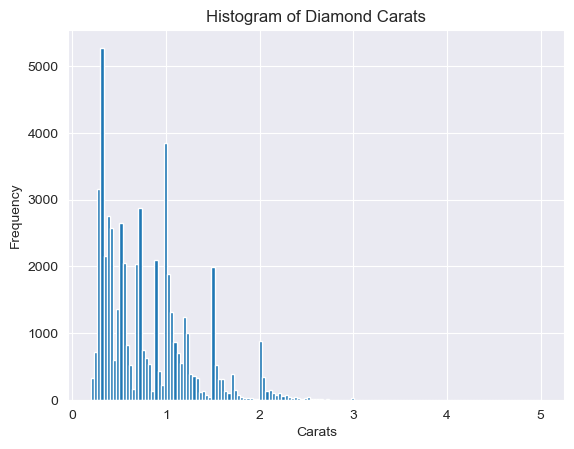

In [9]:
import matplotlib.pyplot as plt

diamonds = pd.read_csv("data/diamonds.csv")

# Assuming 'diamonds' is a pandas DataFrame with a 'carat' column
plt.hist(diamonds['carat'], bins='auto')  # 'bins' parameter can be set as needed
plt.title('Histogram of Diamond Carats')
plt.xlabel('Carats')
plt.ylabel('Frequency')
plt.show()

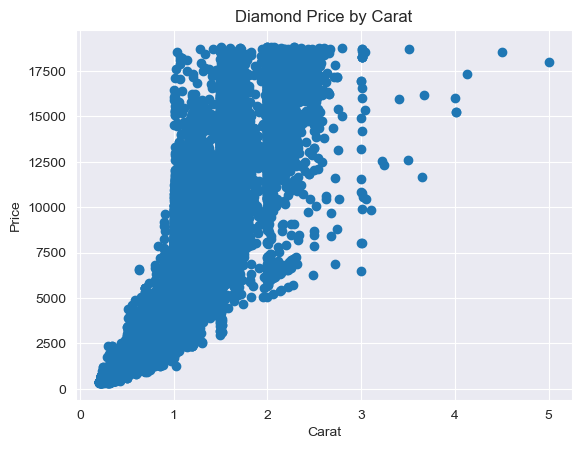

In [10]:
import matplotlib.pyplot as plt

# Assuming 'diamonds' is a pandas DataFrame with 'carat' and 'price' columns
plt.scatter(diamonds['carat'], diamonds['price'])
plt.title('Diamond Price by Carat')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()